<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2520 images belonging to 1 classes.
Found 372 images belonging to 1 classes.


Epoch 1/25
20/20 [==============================] - 259s 13s/step - loss: 31533.4004 - accuracy: 0.2889 - val_loss: 137998.5625 - val_accuracy: 1.0000
Epoch 2/25
20/20 [==============================] - 243s 12s/step - loss: 415123.0000 - accuracy: 0.3556 - val_loss: 574105.3125 - val_accuracy: 1.0000
Epoch 3/25
20/20 [==============================] - 253s 13s/step - loss: 1587555.5000 - accuracy: 0.3556 - val_loss: 1916580.2500 - val_accuracy: 0.0000e+00
Epoch 4/25
20/20 [==============================] - 243s 12s/step - loss: 3834132.7500 - accuracy: 0.3397 - val_loss: 8517490.0000 - val_accuracy: 0.0000e+00
Epoch 5/25
20/20 [==============================] - 251s 13s/step - loss: 7971774.0000 - accuracy: 0.3048 - val_loss: 12321050.0000 - val_accuracy: 1.0000
Epoch 6/25
20/20 [==============================] - 252s 13s/step - loss: 15075299.0000 - accuracy: 0.3556 - val_loss: 9805332.0000 - val_accuracy: 0.0000e+00
Epoch 7/25
20/20 [==============================] - 241s 12s/step -

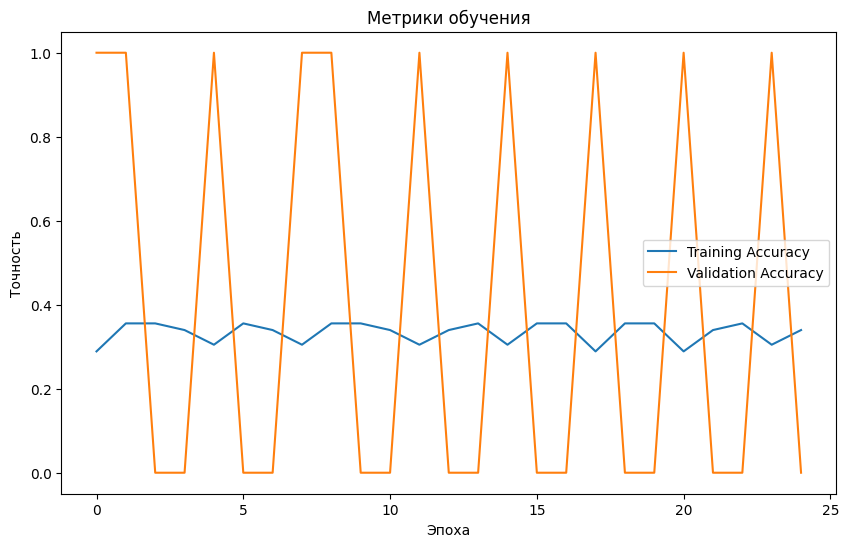

In [4]:
import tensorflow as tf
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Скачивание и разархивация наборов данных
train_url = "https://storage.googleapis.com/download.tensorflow.org/data/rps.zip"
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip"

train_zip_path = tf.keras.utils.get_file("rps.zip", origin=train_url)
test_zip_path = tf.keras.utils.get_file("rps-test-set.zip", origin=test_url)

train_dir = "rps"
test_dir = "rps-test-set"

with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_dir)

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_dir)

# Настройка генератора изображений
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(300, 300),
                batch_size=128,
                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(300, 300),
                batch_size=128,
                class_mode='categorical')

# Определение модели
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax')
])

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# Обучение модели
history = model.fit(
    train_generator,
    epochs=25,
    verbose=1,
    validation_data=test_generator
)

# Визуализация метрик обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Метрики обучения')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()